In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go  
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)

In [4]:
data = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [7]:

data.drop('comments', axis=1, inplace = True)

In [8]:
#count the unique values in the age column
data.Age.value_counts()

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 50              6
 48              6
 20              6
 51              5
 56              4
 49              4
 57              3
 55              3
 54              3
 47              2
 60              2
-29              1
 329             1
 99999999999     1
 58              1
 62              1
 65              1
-1726            1
 5               1
 53              1
 61              1
 8               1
 11              1
-1               1
 72     

**DATA PRE POFILING**

Invalid values:
*  99999999999
* Negative numbers
* Larger than 75
* Under 18 years old

**IDENTIFYING THE OUTLIERS**

In [9]:
data[data['Age']<18]  

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [10]:
data[data['Age'] > 75]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


**Replacing outliers with the median or mean**

In [11]:
median= data['Age'].median()
data.loc[data['Age']<18] = np.nan
data['Age'].fillna(median, inplace=True)

In [12]:
median= data['Age'].median()
data.loc[data['Age']>75]=np.nan
data['Age'].fillna(median, inplace=True)

In [13]:
data['Age'].value_counts()

Age
29.00    85
32.00    82
31.00    75
26.00    75
27.00    71
33.00    70
28.00    68
34.00    65
30.00    63
25.00    61
35.00    55
23.00    51
24.00    46
37.00    43
38.00    39
36.00    37
39.00    33
40.00    33
43.00    28
41.00    21
22.00    21
42.00    20
21.00    16
45.00    12
46.00    12
44.00    11
19.00     9
18.00     7
50.00     6
20.00     6
48.00     6
51.00     5
56.00     4
49.00     4
55.00     3
57.00     3
54.00     3
47.00     2
60.00     2
58.00     1
62.00     1
65.00     1
53.00     1
61.00     1
72.00     1
Name: count, dtype: int64

In [14]:
data['Country'].value_counts()

Country
United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Switzerland                 7
Poland                      7
Sweden                      7
Brazil                      6
South Africa                6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Finland                     3
Austria                     3
Portugal                    2
Colombia                    2
Denmark                     2
Croatia                     2
Greece                      2
Costa Rica                  1
Uruguay                     1
Spain                       1
Latvia                      1
Ro

**States in the U.S. that are mentioned in the survey**

In [15]:
data[data['Country'] == 'United States']['state'].value_counts()

state
CA    138
WA     70
NY     56
TN     45
TX     44
PA     29
OR     29
IL     28
OH     27
IN     27
MI     22
MN     20
MA     20
FL     15
VA     14
NC     14
GA     12
MO     12
WI     12
UT     10
CO      9
AL      7
AZ      7
MD      7
NJ      6
OK      6
KY      5
SC      5
CT      4
IA      4
DC      4
NH      3
SD      3
VT      3
KS      3
NV      3
NM      2
WY      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64

In [16]:
#Percentage of data of the United States 

100 * (data[data['Country'] == 'United States'].shape[0] / data.shape[0])

59.25337569499602

The United States faces almost **60%** of the data, meaning **40%** of these data are out of the country (missing values)

In [17]:

data.drop('state', axis=1, inplace = True)

In [18]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    464
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

In [19]:
data['self_employed'].value_counts()

self_employed
No     1091
Yes     142
Name: count, dtype: int64

In [20]:
data['self_employed'] = data['self_employed'].replace(np.nan, data['self_employed'].mode()[0])
data['work_interfere'] = data['work_interfere'].replace(np.nan, data['work_interfere'].mode()[0])

In [21]:

data['work_interfere'].value_counts()

work_interfere
Sometimes    734
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1251 non-null   object 
 1   Age                        1259 non-null   float64
 2   Gender                     1251 non-null   object 
 3   Country                    1251 non-null   object 
 4   self_employed              1259 non-null   object 
 5   family_history             1251 non-null   object 
 6   treatment                  1251 non-null   object 
 7   work_interfere             1259 non-null   object 
 8   no_employees               1251 non-null   object 
 9   remote_work                1251 non-null   object 
 10  tech_company               1251 non-null   object 
 11  benefits                   1251 non-null   object 
 12  care_options               1251 non-null   object 
 13  wellness_program           1251 non-null   objec

In [23]:
data['mental_health_consequence'].value_counts()

mental_health_consequence
No       487
Maybe    476
Yes      288
Name: count, dtype: int64

**WHICH AGE GROUP EXPERIENCING THE MOST MENTAL HEALTH ISSUES?**

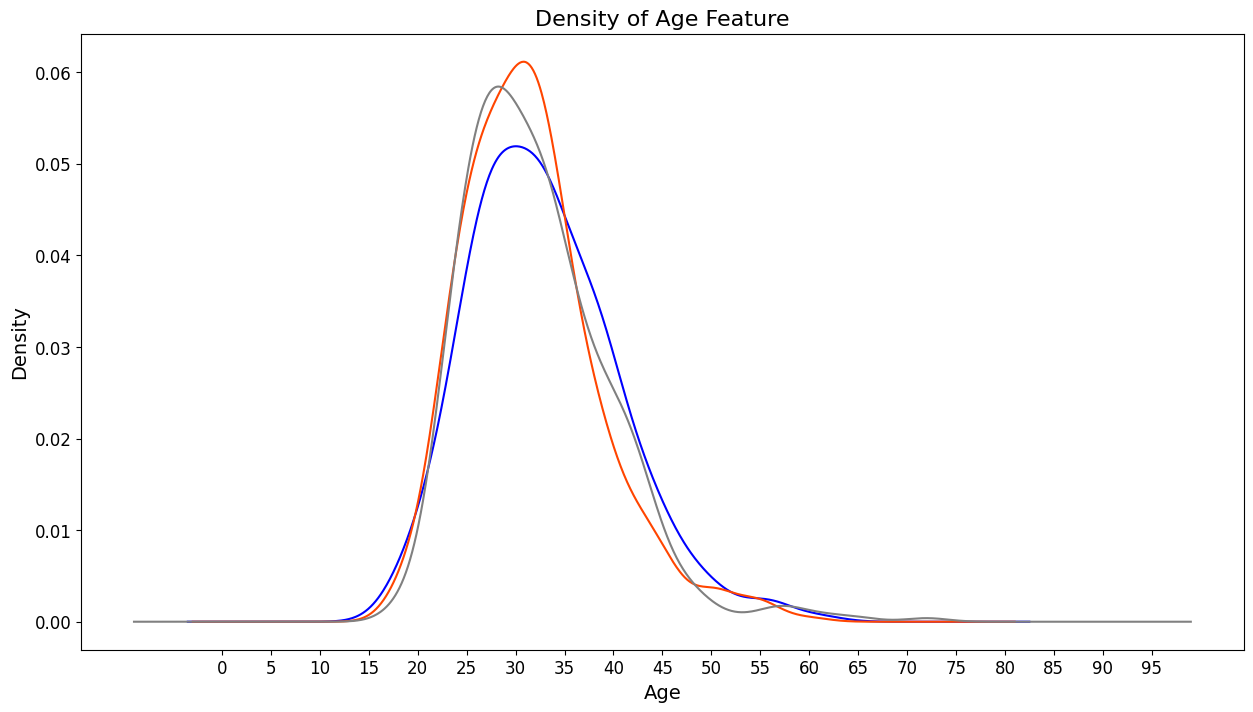

In [24]:
figure = plt.figure(figsize=[15, 8])

data[data['mental_health_consequence'] == 'Yes']['Age'].plot.kde(color='blue')
data[data['mental_health_consequence'] == 'No']['Age'].plot.kde(color='orangered')
data[data['mental_health_consequence'] == 'Maybe']['Age'].plot.kde(color='grey')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age Feature', size=16)
plt.show()

In [25]:
data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.00,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.00,M,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32.00,Male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.00,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.00,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**CLEANING DATA FOR DATA VISUALIZATION**

*The objective of this analysis is to show how serious mental health is in the technology industry according to Age, Gender *

For that reason, irrelevant data needs to be excluded for better visualization and eliminating clusters 


In [26]:
print(data.columns)




Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


In [27]:
if 'phys_health_interview' in data.columns:
    data.drop('phys_health_interview', axis=1, inplace=True)
print(data)


                Timestamp   Age  Gender         Country self_employed  \
0     2014-08-27 11:29:31 37.00  Female   United States            No   
1     2014-08-27 11:29:37 44.00       M   United States            No   
2     2014-08-27 11:29:44 32.00    Male          Canada            No   
3     2014-08-27 11:29:46 31.00    Male  United Kingdom            No   
4     2014-08-27 11:30:22 31.00    Male   United States            No   
...                   ...   ...     ...             ...           ...   
1254  2015-09-12 11:17:21 26.00    male  United Kingdom            No   
1255  2015-09-26 01:07:35 32.00    Male   United States            No   
1256  2015-11-07 12:36:58 34.00    male   United States            No   
1257  2015-11-30 21:25:06 46.00       f   United States            No   
1258  2016-02-01 23:04:31 25.00    Male   United States            No   

     family_history treatment work_interfere    no_employees remote_work  ...  \
0                No       Yes          Oft

In [28]:
data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.00,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Yes,No
1,2014-08-27 11:29:37,44.00,M,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Don't know,Maybe,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32.00,Male,Canada,No,No,No,Rarely,6-25,No,...,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.00,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,No,Yes
4,2014-08-27 11:30:22,31.00,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Don't know,No


In [29]:
if 'phys_health_consequence' in data.columns:
    data.drop('phys_health_consequence', axis=1, inplace=True)
data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.00,Female,United States,No,No,Yes,Often,6-25,No,...,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Yes,No
1,2014-08-27 11:29:37,44.00,M,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32.00,Male,Canada,No,No,No,Rarely,6-25,No,...,No,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.00,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,No,Yes
4,2014-08-27 11:30:22,31.00,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.00,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,No,No,Don't know,Somewhat easy,No,Some of them,Some of them,No,Don't know,No
1255,2015-09-26 01:07:35,32.00,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,Yes,No
1256,2015-11-07 12:36:58,34.00,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,No
1257,2015-11-30 21:25:06,46.00,f,United States,No,No,No,Sometimes,100-500,Yes,...,No,No,Don't know,Don't know,Yes,No,No,No,No,No


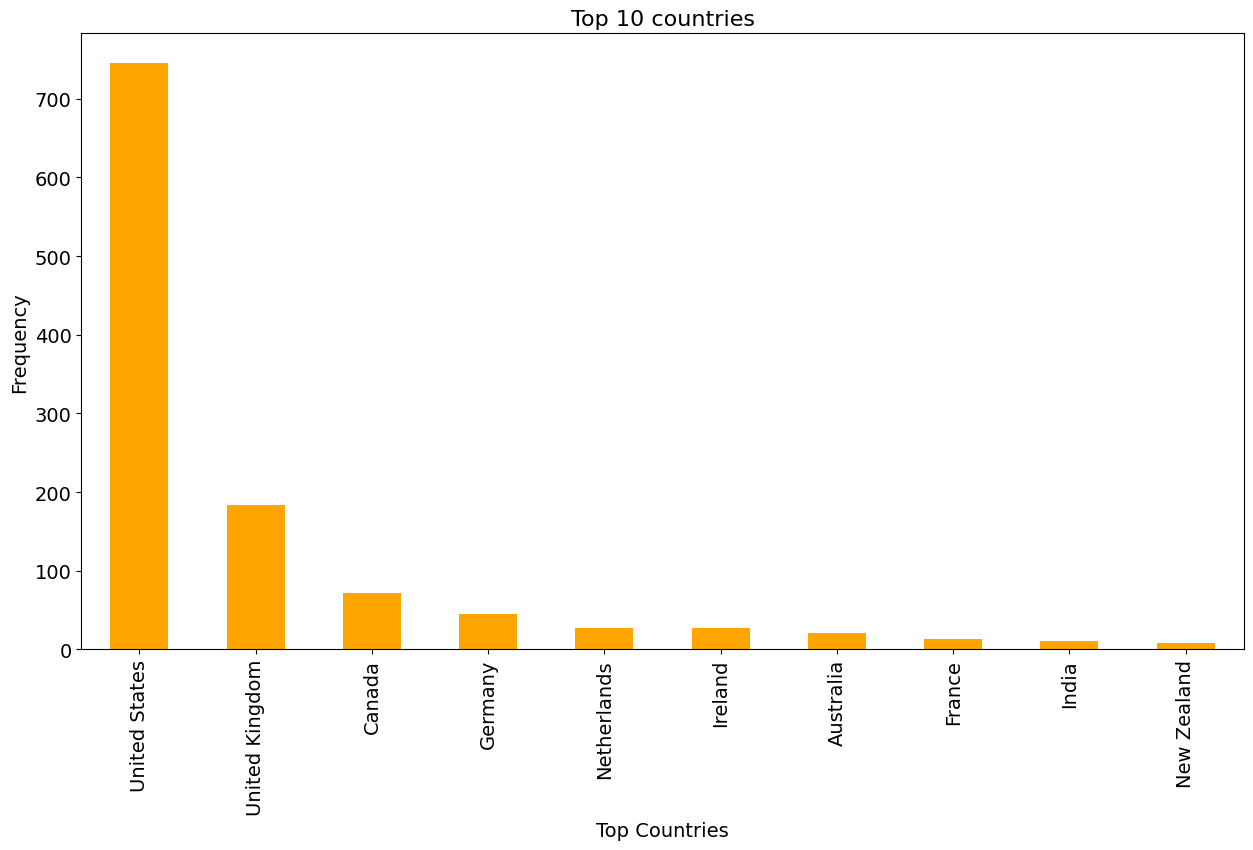

In [30]:
fig = plt.figure(figsize=[15,8])

data['Country'].value_counts().head(10).plot.bar(color='orange')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()


**The Majority of the Records are from the U.S thus our analysis will focus in the survey in the United States only**

In [31]:

# Filter the DataFrame to keep only rows where the Country column is 'United States'
df_filtered = data[data['Country'] == 'United States']
df_filtered

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.00,Female,United States,No,No,Yes,Often,6-25,No,...,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Yes,No
1,2014-08-27 11:29:37,44.00,M,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No
4,2014-08-27 11:30:22,31.00,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,No
5,2014-08-27 11:31:22,33.00,Male,United States,No,Yes,No,Sometimes,6-25,No,...,No,Don't know,Don't know,Don't know,No,Yes,Yes,No,Don't know,No
6,2014-08-27 11:31:50,35.00,Female,United States,No,Yes,Yes,Sometimes,1-5,Yes,...,No,No,No,Somewhat difficult,Maybe,Some of them,No,No,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36.00,Male,United States,No,Yes,No,Rarely,More than 1000,No,...,Yes,Yes,Don't know,Somewhat easy,Maybe,Some of them,Some of them,No,Don't know,No
1255,2015-09-26 01:07:35,32.00,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,Yes,No
1256,2015-11-07 12:36:58,34.00,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,No
1257,2015-11-30 21:25:06,46.00,f,United States,No,No,No,Sometimes,100-500,Yes,...,No,No,Don't know,Don't know,Yes,No,No,No,No,No


In [32]:
df_filtered.to_csv('mycsvfile.csv',index=False)

In [33]:
df_filtered['Gender'].value_counts()

Gender
Male                345
M                    92
male                 89
Female               82
female               43
F                    34
m                    18
f                    11
Make                  4
Female (trans)        2
Woman                 2
Female                2
Cis Male              2
Cis Female            1
Trans-female          1
maile                 1
Male-ish              1
Femake                1
non-binary            1
queer/she/they        1
Male (CIS)            1
Genderqueer           1
Nah                   1
cis-female/femme      1
woman                 1
Male                  1
Trans woman           1
Man                   1
msle                  1
Female (cis)          1
Mail                  1
cis male              1
femail                1
Name: count, dtype: int64

In [34]:
#unique values in the Gender field

print('Unique Genders present in the data :', data['Gender'].nunique())
print('Unique Genders present in the data :', set(data['Gender']))

Unique Genders present in the data : 46
Unique Genders present in the data : {'queer/she/they', 'femail', 'Female', 'Enby', 'fluid', 'Cis Female', 'Cis Man', 'msle', 'Make', 'Guy (-ish) ^_^', 'f', 'Woman', 'maile', 'Male', 'cis-female/femme', 'Androgyne', 'male', 'Man', 'Agender', 'male leaning androgynous', 'something kinda male?', 'Trans woman', 'non-binary', 'Femake', 'Female (cis)', 'Mail', 'Female (trans)', 'F', 'Female ', 'm', 'M', 'woman', 'Mal', 'Malr', 'Genderqueer', 'female', 'Trans-female', 'Nah', 'queer', 'Cis Male', 'cis male', 'Neuter', 'Male-ish', 'Male ', 'ostensibly male, unsure what that really means', nan, 'Male (CIS)'}


**GENDER CLASSIFICATION FOR DATA VISUALIZATION**

In [35]:
df = pd.DataFrame(df_filtered)
# Function to classify gender
def classify_gender(Gender):
    if pd.isnull(Gender):
        return 'Other'  # Treating missing values as 'Other'
    gender = Gender.strip().lower()
    if gender in {'male', 'm', 'male (cis)', 'cis male', 'man', 'cismale', 'male ', 'msle', 'mal', 'maile', 'malr', 'mail'}:
        return 'Male'
    elif gender in {'female', 'f', 'female (cis)', 'cis female', 'woman', 'cisfemale', 'female ', 'femail', 'femake'}:
        return 'Female'
    else:
        return 'Other'

# Apply the classification
df['Gender_Classified'] = df['Gender'].apply(classify_gender)
print(df.columns)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'mental_vs_physical', 'obs_consequence',
       'Gender_Classified'],
      dtype='object')


In [36]:
#Confirmation
if 'Gender_Classified' in df.columns:
    print("Gender_Classified exists.")
else:
    print("Gender_Classified does not exist.")


Gender_Classified exists.


**How each gender answer this survey question**

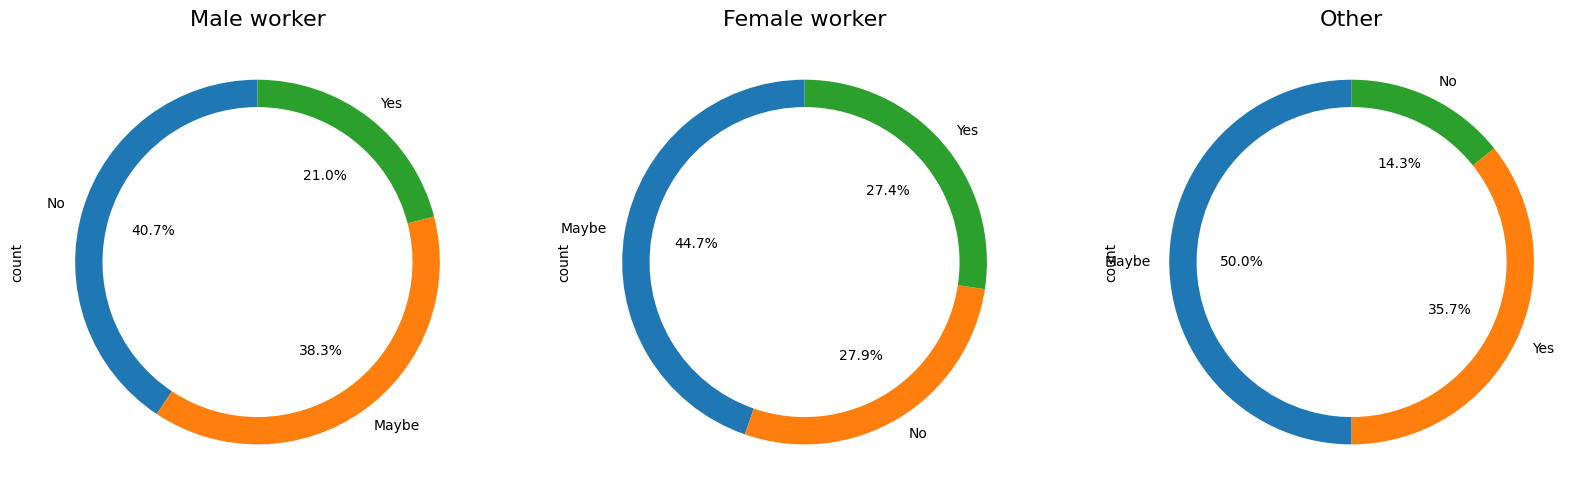

In [37]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
df['mental_health_consequence'][df['Gender_Classified'] == 'Male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.15), startangle=90)
plt.title(label='Male worker', size=16)

plt.subplot(1,3,2)
df['mental_health_consequence'][df['Gender_Classified'] == 'Female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops=dict(width=0.15), startangle=90)
plt.title(label='Female worker', size=16)

plt.subplot(1,3,3)
df['mental_health_consequence'][df['Gender_Classified'] == 'Other'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.15), startangle=90)
plt.title(label='Other', size=16)

plt.show()


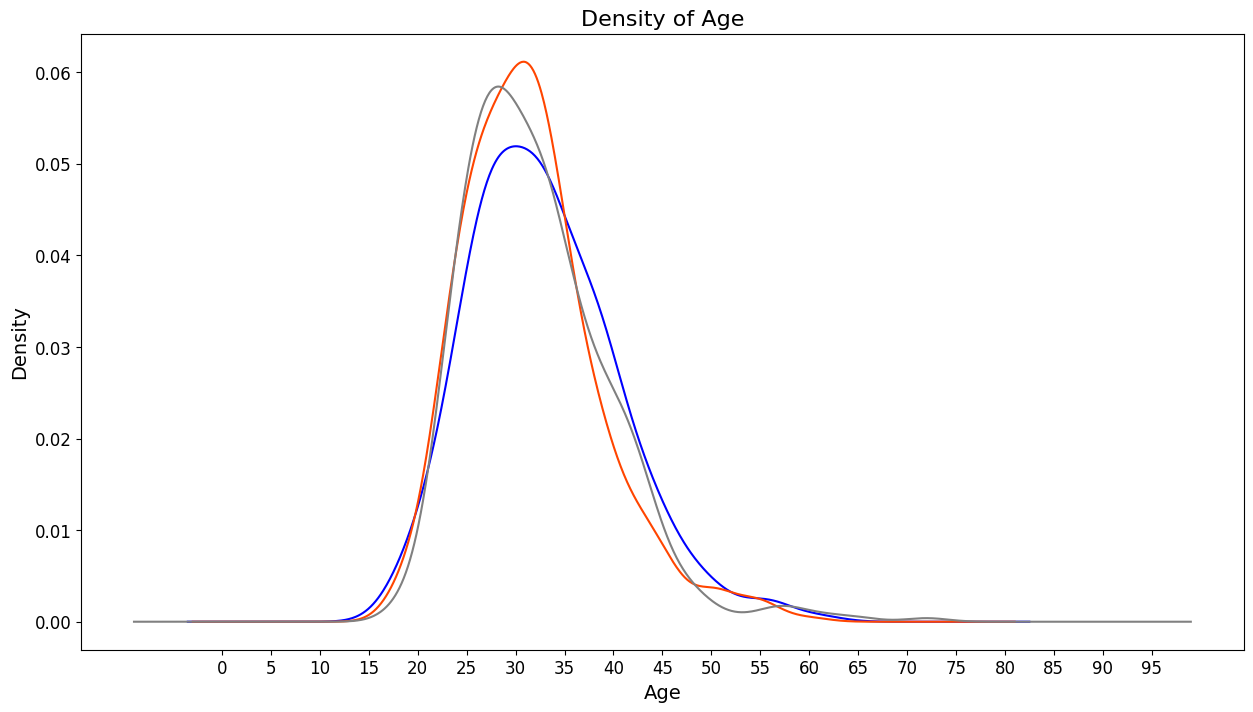

In [38]:
figure = plt.figure(figsize=[15, 8])

data[data['mental_health_consequence'] == 'Yes']['Age'].plot.kde(color='blue')
data[data['mental_health_consequence'] == 'No']['Age'].plot.kde(color='orangered')
data[data['mental_health_consequence'] == 'Maybe']['Age'].plot.kde(color='grey')

plt.xticks(ticks=np.arange(0, 100, 5), size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.title(label='Density of Age', size=16)
plt.show()

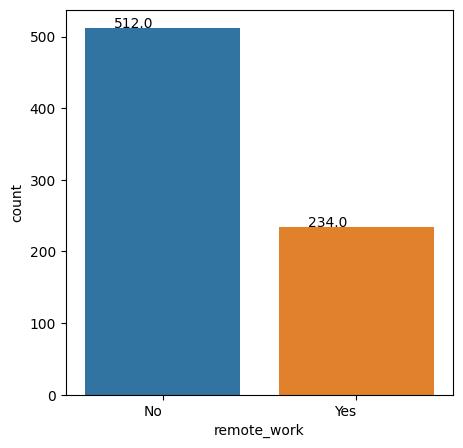

In [39]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='remote_work', data=df_filtered)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')


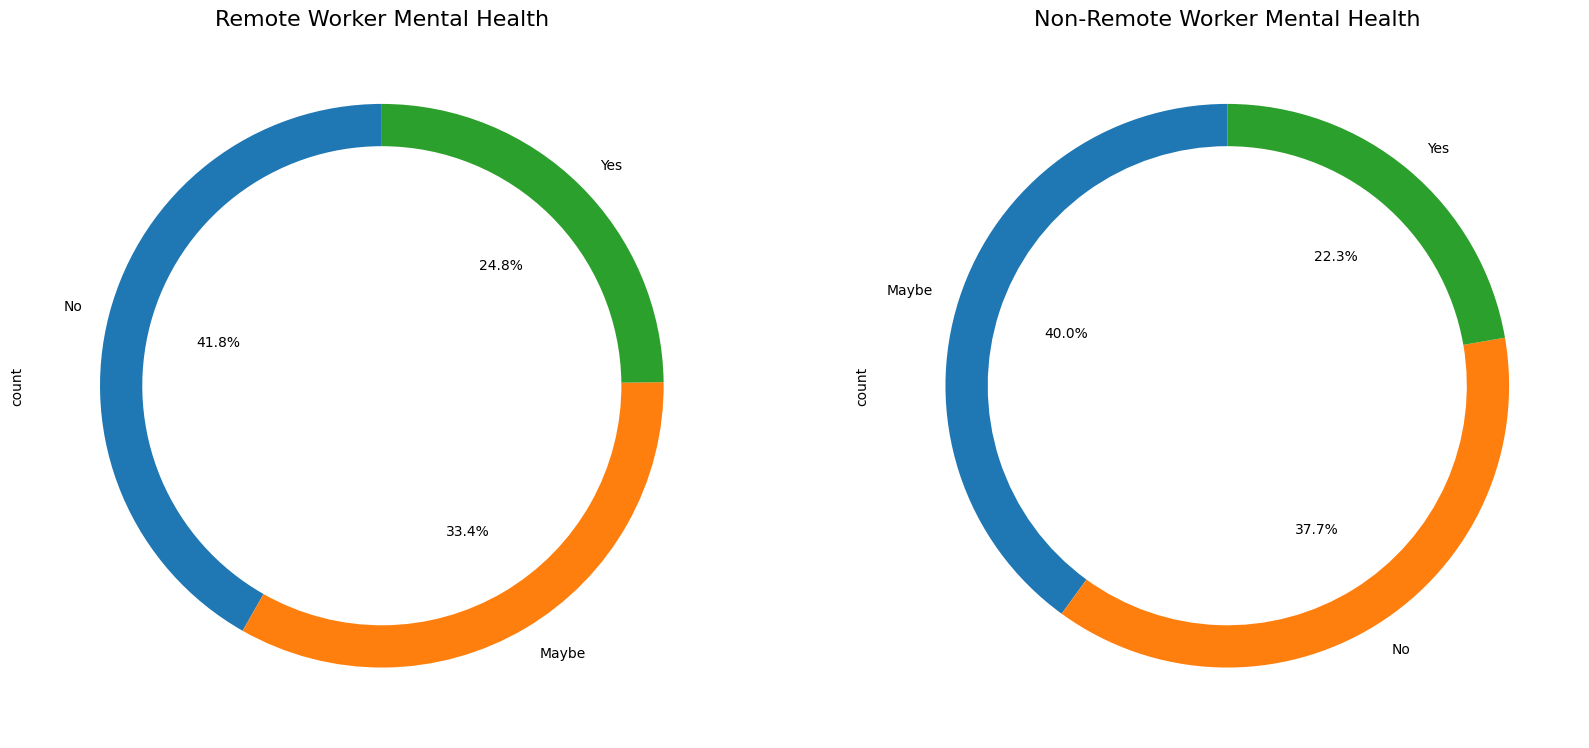

In [40]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,2,1)
data['mental_health_consequence'][data['remote_work'] == 'Yes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Remote Worker Mental Health', size=16)

plt.subplot(1,2,2)
data['mental_health_consequence'][data['remote_work'] == 'No'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Non-Remote Worker Mental Health', size=16)

plt.show()

* 24.8% of the suvey contributors said Yes for having problems with their mental health while working remotely 


For that reason, we have to consider factors that affect their working environment 


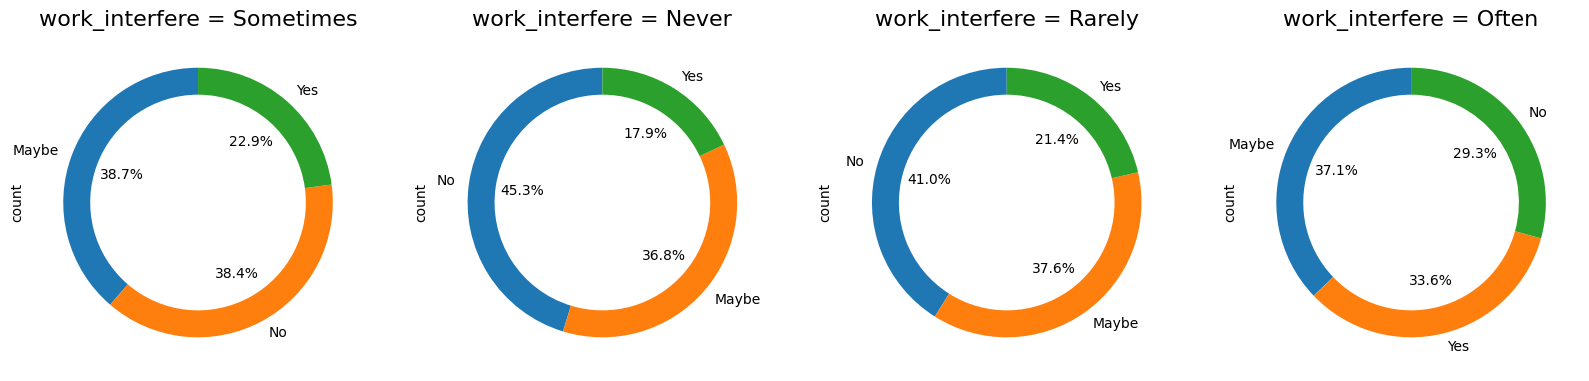

In [41]:


figure = plt.figure(figsize=[20, 10])

plt.subplot(1,4,1)
data['mental_health_consequence'][data['work_interfere'] == 'Sometimes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Sometimes', size=16)

plt.subplot(1,4,2)
data['mental_health_consequence'][data['work_interfere'] == 'Never'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Never', size=16)

plt.subplot(1,4,3)
data['mental_health_consequence'][data['work_interfere'] == 'Rarely'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Rarely', size=16)

plt.subplot(1,4,4)
data['mental_health_consequence'][data['work_interfere'] == 'Often'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.20), startangle=90)
plt.title(label='work_interfere = Often', size=16)

plt.show()



**We can observe that employees who are more 'Often' & 'Rarely' interfered during work are likely to have Mental health issues.
Thus, was it the work-load for Remote jobs are immoderate?**

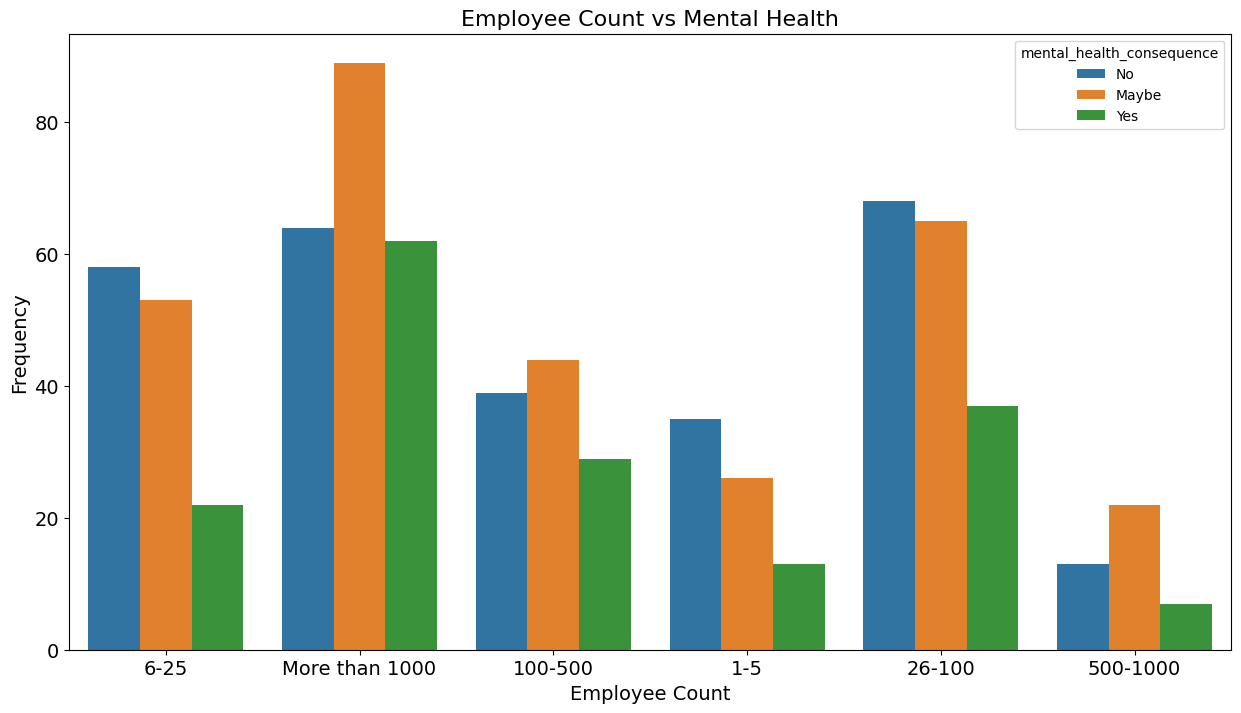

In [42]:

figure = plt.figure(figsize=[15, 8])

sns.countplot(x = 'no_employees', hue ='mental_health_consequence', data=df_filtered)

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Employee Count', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Employee Count vs Mental Health', size=16)

plt.show()



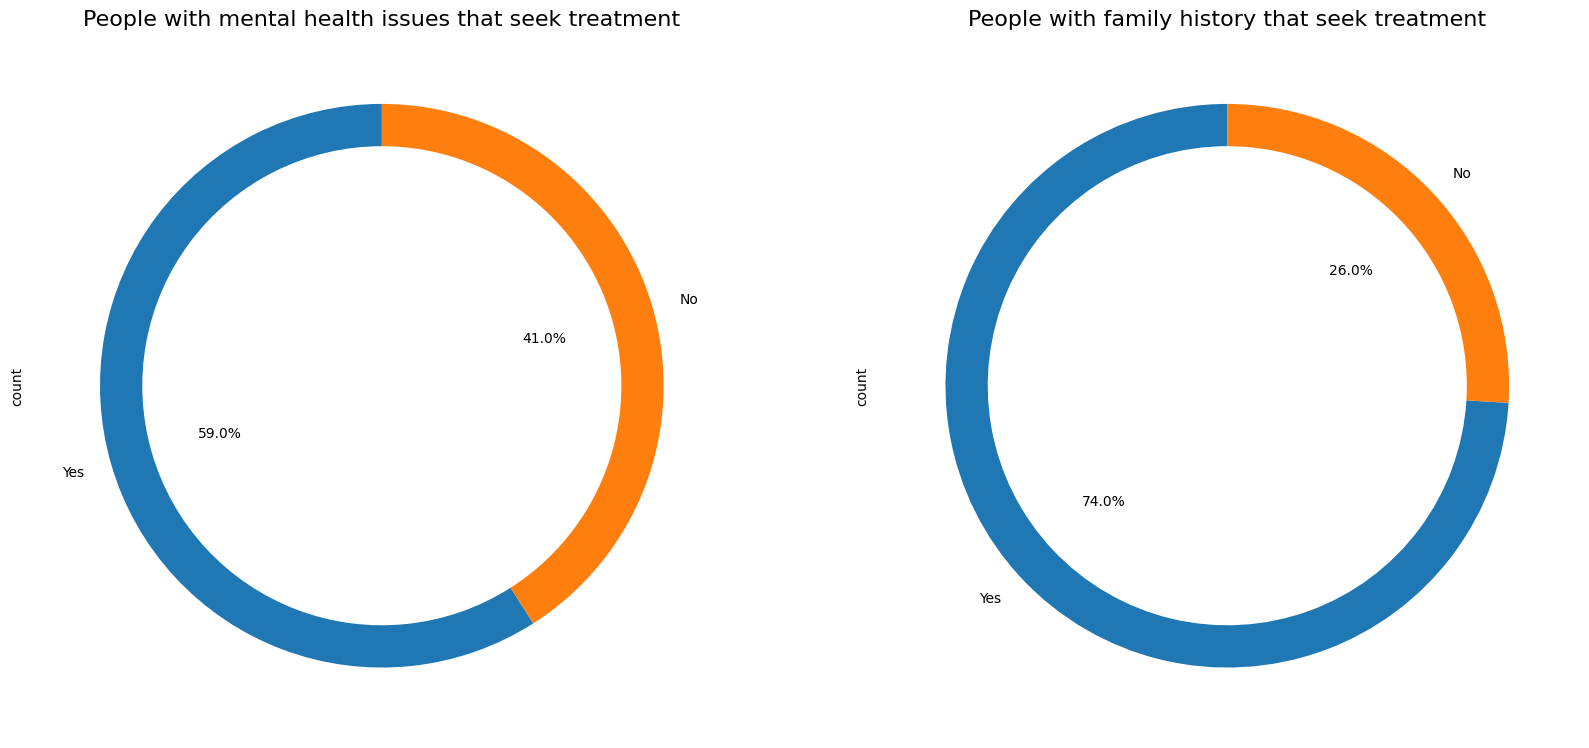

In [43]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,2,1)
data['treatment'][data['mental_health_consequence'] == 'Yes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='People with mental health issues that seek treatment', size=16)


plt.subplot(1,2,2)
data['treatment'][data['family_history'] == 'Yes'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='People with family history that seek treatment', size=16)

plt.show()


**Conclusion:** People with family history tend to come forward and seek treatment rather than stay quiet

**Do people with no family history of mental health ask for help or treatment in their journey?**

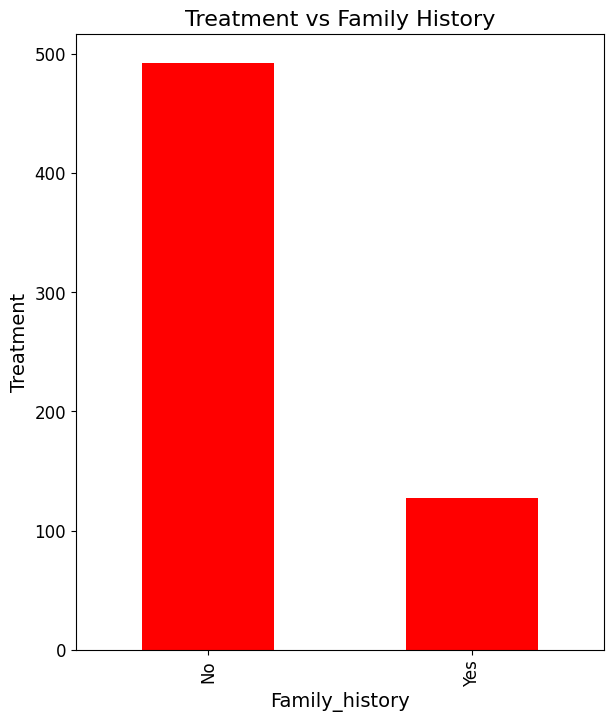

In [44]:
figure = plt.figure(figsize=[15, 8])

plt.subplot(1,2,1)
data.groupby(['treatment','family_history'])['family_history'].count()['No'].plot.bar(color='red')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history', size=14)
plt.ylabel(ylabel='Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)
plt.show()